In [34]:
import pandas as pd
from plotnine import ggplot, geom_point, geom_bar, aes, stat_smooth, facet_wrap

In [35]:
iris = pd.read_csv('iris.csv', header=None)

In [36]:
iris.columns = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'species']
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


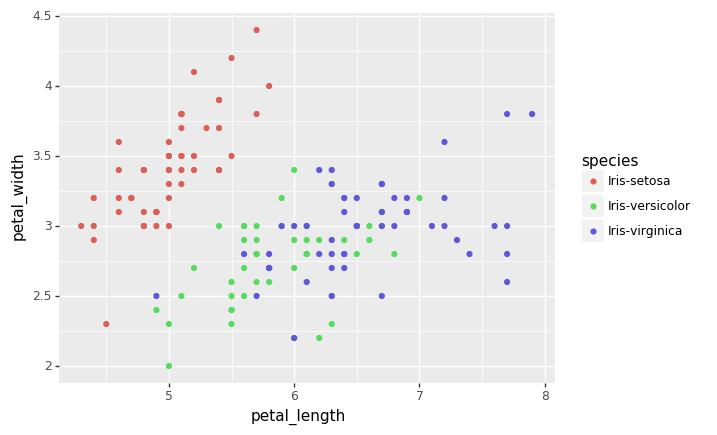

<ggplot: (8764806430885)>

In [37]:
ggplot(iris, aes(x='petal_length', y='petal_width', color='species')) + geom_point()

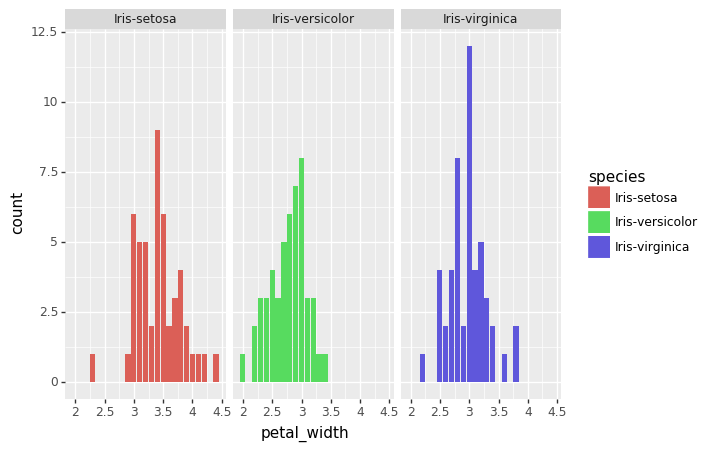

<ggplot: (8764806385453)>

In [38]:
ggplot(iris, aes(x='petal_width', fill='species')) + geom_bar(stat='count') + facet_wrap('species')